## PROJECT AIM

This project aims to design a smart property management platform to improve the experience for property managers, landlords, and tenants.

In [74]:
# Importing Libery

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [2]:
# loading the dataset
df = pd.read_csv('Smart_Property_Management _Dataset.csv')

In [3]:
# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

display(df_info, df_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Property_ID                                   1000 non-null   object 
 2   Sex                                           1000 non-null   object 
 3   Age                                           5247 non-null   int64  
 4   Years_Of_Experience                           1000 non-null   float64
 5   Used_Property_Management_Software             1000 non-null   object 
 6   Devices_Used_Most                             1000 non-null   object 
 7   Preferred_Contact_Method                      1000 non-null   object 
 8   Family_status                                 1000 non-null   object 
 9   Thoughts_On_Smart_Home_Integration            1000 non-null   o

None

,User_ID,Property_ID,Sex,Age,Years_Of_Experience,Used_Property_Management_Software,Devices_Used_Most,Preferred_Contact_Method,Family_status,Thoughts_On_Smart_Home_Integration,Property_Management_Service_Need_Improvement,Preferred_Payment_Method,Remainder_Report_Duration,Country,State,City,Property_size,Type
0,12ecd43d-9f9e-4a6d-980e-69ad8feace42,e3e70682-c209-4cac-a29f-6fbed82c07cd,Female,62,3.0,No,Phone,Email,Civil marriage,"Improved Security,Attracting Tenants","Tenant Centric Service,Maintenance",Cash,Yearly,Nigeria,Yobe,Damaturu,5263.82,House
1,579a1e2f-e51d-4c92-b7ec-44da2c30fa45,c8a70639-eb11-47b3-a7a9-c3787c65c1e5,Male,62,5.0,No,"Laptop,Phone",Phone,Married,"High Initial Costs,Improved Security",Real-Time monitoring,Direct Credit/Debit,Monthly,Nigeria,Cross River,Obudu,7259.99,Commercial
2,dc9d6edb-e7bd-457b-befa-00ffd6556cc1,81332876-37eb-4cd9-a87a-1613e443df78,Male,44,4.0,Yes,Phone,Email,Single / not married,?,Tenant Centric Service,Cash,Yearly,Nigeria,Taraba,Serti,9189.73,House
3,e92fd180-a19e-415a-9d96-b6c5408243e6,fcbd04c3-4021-4ef7-8ca5-a5a19e4d6e3c,Female,54,3.0,No,Phone,Email,Separated,"High Initial Costs,Improved Security","Real-Time monitoring,Maintenance",Cash,Yearly,Nigeria,Ogun,Sango Ota,9245.96,Apartment
4,f3843dd6-6476-45b2-84c1-cb09fee42123,12e0c8b2-bad6-40fb-9948-8dec4f65d4d9,Female,64,2.0,No,Phone,Email,Married,?,"Streamline Communication,Real-Time monitoring",Direct Credit/Debit,Quarterly,Nigeria,Zamfara,Kaura Namoda,2872.57,Apartment


In [4]:
# Descriptive Statistics
numerical_summary = df.describe()
categorical_summary = df.describe(include=['object'])

display(numerical_summary, categorical_summary)

,Age,Years_Of_Experience,Property_size
count,5247.000000,1000.000000,1001.000000
mean,47.712979,3.125000,5079.872777
std,10.400993,1.988298,2874.379964
min,30.000000,0.000000,105.160000
25%,39.000000,2.000000,2596.920000
50%,48.000000,3.000000,5139.980000
75%,57.000000,5.000000,7563.640000
max,65.000000,9.000000,9976.860000


,User_ID,Property_ID,Sex,Used_Property_Management_Software,Devices_Used_Most,Preferred_Contact_Method,Family_status,Thoughts_On_Smart_Home_Integration,Property_Management_Service_Need_Improvement,Preferred_Payment_Method,Remainder_Report_Duration,Country,State,City,Type
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1001,1001,1001,1000
unique,1000,1000,2,2,3,2,5,9,13,3,4,1,37,184,3
top,12ecd43d-9f9e-4a6d-980e-69ad8feace42,e3e70682-c209-4cac-a29f-6fbed82c07cd,Female,No,Phone,Phone,Married,"High Initial Costs,Improved Security",Tenant Centric Service,Direct Credit/Debit,Yearly,Nigeria,Abia,Arochukwu,Apartment
freq,1,1,518,511,570,505,684,191,195,450,440,1001,36,13,369


In [5]:
# Identify and drop irrelevant features
irrelevant_features = ['User_ID', 'Property_ID']
df = df.drop(columns = irrelevant_features, errors = 'ignore')

df.head()# To check the change effect

,Sex,Age,Years_Of_Experience,Used_Property_Management_Software,Devices_Used_Most,Preferred_Contact_Method,Family_status,Thoughts_On_Smart_Home_Integration,Property_Management_Service_Need_Improvement,Preferred_Payment_Method,Remainder_Report_Duration,Country,State,City,Property_size,Type
0,Female,62,3.0,No,Phone,Email,Civil marriage,"Improved Security,Attracting Tenants","Tenant Centric Service,Maintenance",Cash,Yearly,Nigeria,Yobe,Damaturu,5263.82,House
1,Male,62,5.0,No,"Laptop,Phone",Phone,Married,"High Initial Costs,Improved Security",Real-Time monitoring,Direct Credit/Debit,Monthly,Nigeria,Cross River,Obudu,7259.99,Commercial
2,Male,44,4.0,Yes,Phone,Email,Single / not married,?,Tenant Centric Service,Cash,Yearly,Nigeria,Taraba,Serti,9189.73,House
3,Female,54,3.0,No,Phone,Email,Separated,"High Initial Costs,Improved Security","Real-Time monitoring,Maintenance",Cash,Yearly,Nigeria,Ogun,Sango Ota,9245.96,Apartment
4,Female,64,2.0,No,Phone,Email,Married,?,"Streamline Communication,Real-Time monitoring",Direct Credit/Debit,Quarterly,Nigeria,Zamfara,Kaura Namoda,2872.57,Apartment


In [6]:
# convertingvariable to appropriate datatype
df['Age'] = pd.to_numeric(df['Age'], errors='coerce', downcast='float')


df.head()

,Sex,Age,Years_Of_Experience,Used_Property_Management_Software,Devices_Used_Most,Preferred_Contact_Method,Family_status,Thoughts_On_Smart_Home_Integration,Property_Management_Service_Need_Improvement,Preferred_Payment_Method,Remainder_Report_Duration,Country,State,City,Property_size,Type
0,Female,62.0,3.0,No,Phone,Email,Civil marriage,"Improved Security,Attracting Tenants","Tenant Centric Service,Maintenance",Cash,Yearly,Nigeria,Yobe,Damaturu,5263.82,House
1,Male,62.0,5.0,No,"Laptop,Phone",Phone,Married,"High Initial Costs,Improved Security",Real-Time monitoring,Direct Credit/Debit,Monthly,Nigeria,Cross River,Obudu,7259.99,Commercial
2,Male,44.0,4.0,Yes,Phone,Email,Single / not married,?,Tenant Centric Service,Cash,Yearly,Nigeria,Taraba,Serti,9189.73,House
3,Female,54.0,3.0,No,Phone,Email,Separated,"High Initial Costs,Improved Security","Real-Time monitoring,Maintenance",Cash,Yearly,Nigeria,Ogun,Sango Ota,9245.96,Apartment
4,Female,64.0,2.0,No,Phone,Email,Married,?,"Streamline Communication,Real-Time monitoring",Direct Credit/Debit,Quarterly,Nigeria,Zamfara,Kaura Namoda,2872.57,Apartment


In [7]:
missing_values = df.isnull().sum()
display(missing_values)

Sex                                             4247
Age                                                0
Years_Of_Experience                             4247
Used_Property_Management_Software               4247
Devices_Used_Most                               4247
Preferred_Contact_Method                        4247
Family_status                                   4247
Thoughts_On_Smart_Home_Integration              4247
Property_Management_Service_Need_Improvement    4247
Preferred_Payment_Method                        4247
Remainder_Report_Duration                       4247
Country                                         4246
State                                           4246
City                                            4246
Property_size                                   4246
Type                                            4247
dtype: int64

In [13]:
# Handle missing values
# df.select_dtypes(include = ['object']).columns: df[columns].fillna(df[columns]).mode()[0], inplace = True)
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)
df['Used_Property_Management_Software'].fillna(df['Used_Property_Management_Software'].mode()[0], inplace=True)
df['Devices_Used_Most'].fillna(df['Devices_Used_Most'].mode()[0], inplace=True)
df['Preferred_Contact_Method'].fillna(df['Preferred_Contact_Method'].mode()[0], inplace=True)
df['Family_status'].fillna(df['Family_status'].mode()[0], inplace=True)
df['Thoughts_On_Smart_Home_Integration'].fillna(df['Thoughts_On_Smart_Home_Integration'].mode()[0], inplace=True)
df['Property_Management_Service_Need_Improvement'].fillna(df['Property_Management_Service_Need_Improvement'].mode()[0], inplace=True)
df['Used_Property_Management_Software'].fillna(df['Used_Property_Management_Software'].mode()[0], inplace=True)
df['Preferred_Payment_Method'].fillna(df['Preferred_Payment_Method'].mode()[0], inplace=True)
df['State'].fillna(df['State'].mode()[0], inplace=True)
df['Remainder_Report_Duration'].fillna(df['Remainder_Report_Duration'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)
df['Property_size'].fillna(df['Property_size'].median(), inplace=True)
df['Years_Of_Experience'].fillna(df['Years_Of_Experience'].median(), inplace=True)

# Verify changes
df.info()
missing_values = df.isnull().sum()
print(missing_values)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Sex                                           5247 non-null   object 
 1   Age                                           5247 non-null   float32
 2   Years_Of_Experience                           5247 non-null   float64
 3   Used_Property_Management_Software             5247 non-null   object 
 4   Devices_Used_Most                             5247 non-null   object 
 5   Preferred_Contact_Method                      5247 non-null   object 
 6   Family_status                                 5247 non-null   object 
 7   Thoughts_On_Smart_Home_Integration            5247 non-null   object 
 8   Property_Management_Service_Need_Improvement  5247 non-null   object 
 9   Preferred_Payment_Method                      5247 non-null   o

,Sex,Age,Years_Of_Experience,Used_Property_Management_Software,Devices_Used_Most,Preferred_Contact_Method,Family_status,Thoughts_On_Smart_Home_Integration,Property_Management_Service_Need_Improvement,Preferred_Payment_Method,Remainder_Report_Duration,Country,State,City,Property_size,Type
0,Female,62.0,3.0,No,Phone,Email,Civil marriage,"Improved Security,Attracting Tenants","Tenant Centric Service,Maintenance",Cash,Yearly,Nigeria,Yobe,Damaturu,5263.82,House
1,Male,62.0,5.0,No,"Laptop,Phone",Phone,Married,"High Initial Costs,Improved Security",Real-Time monitoring,Direct Credit/Debit,Monthly,Nigeria,Cross River,Obudu,7259.99,Commercial
2,Male,44.0,4.0,Yes,Phone,Email,Single / not married,?,Tenant Centric Service,Cash,Yearly,Nigeria,Taraba,Serti,9189.73,House
3,Female,54.0,3.0,No,Phone,Email,Separated,"High Initial Costs,Improved Security","Real-Time monitoring,Maintenance",Cash,Yearly,Nigeria,Ogun,Sango Ota,9245.96,Apartment
4,Female,64.0,2.0,No,Phone,Email,Married,?,"Streamline Communication,Real-Time monitoring",Direct Credit/Debit,Quarterly,Nigeria,Zamfara,Kaura Namoda,2872.57,Apartment


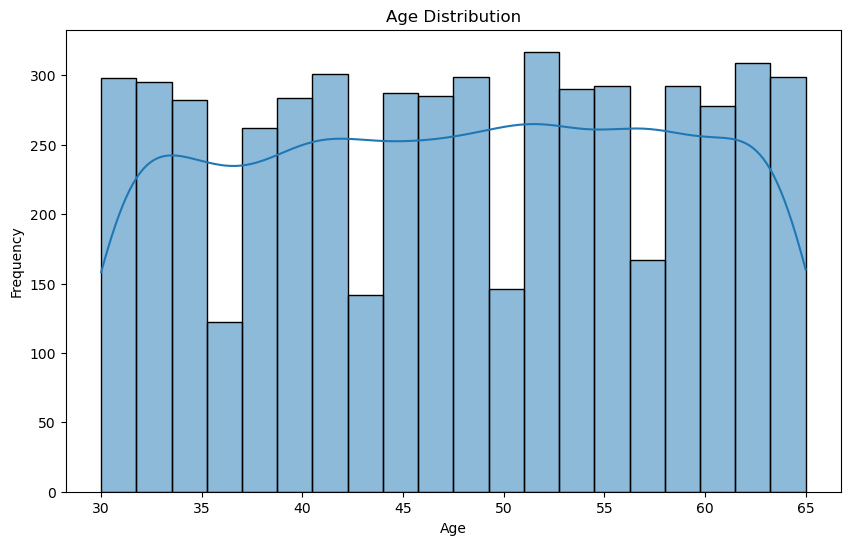

In [14]:
# Visualizations
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

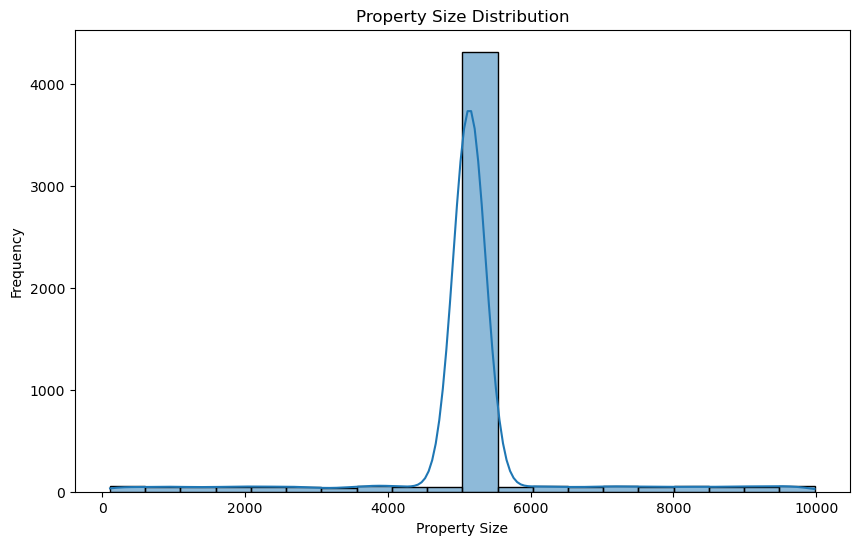

In [15]:
# Property Size Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Property_size'].dropna(), bins=20, kde=True)
plt.title('Property Size Distribution')
plt.xlabel('Property Size')
plt.ylabel('Frequency')
plt.show()

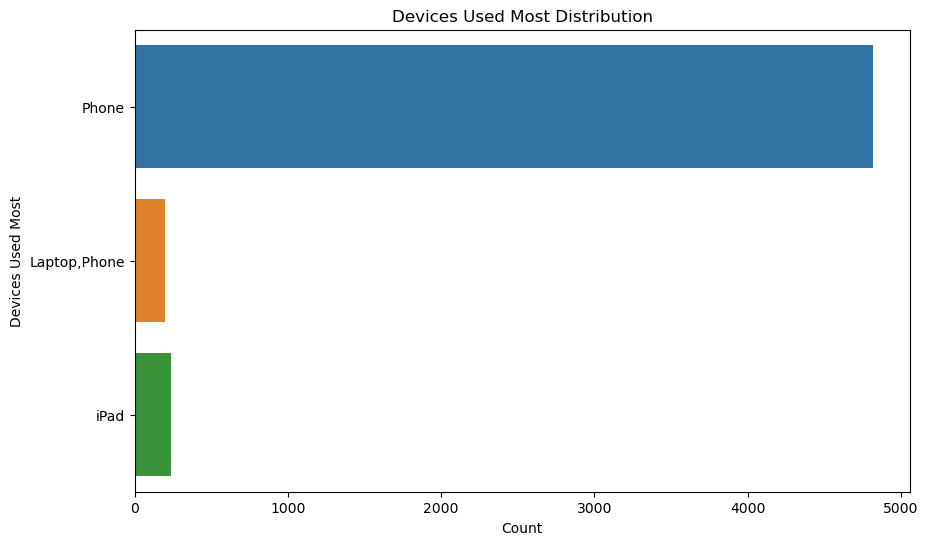

In [16]:
# Devices Used Most Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Devices_Used_Most', data=df)
plt.title('Devices Used Most Distribution')
plt.xlabel('Count')
plt.ylabel('Devices Used Most')
plt.show()

In [18]:
display(df)

,Sex,Age,Years_Of_Experience,Used_Property_Management_Software,Devices_Used_Most,Preferred_Contact_Method,Family_status,Thoughts_On_Smart_Home_Integration,Property_Management_Service_Need_Improvement,Preferred_Payment_Method,Remainder_Report_Duration,Country,State,City,Property_size,Type
0,Female,62.0,3.0,No,Phone,Email,Civil marriage,"Improved Security,Attracting Tenants","Tenant Centric Service,Maintenance",Cash,Yearly,Nigeria,Yobe,Damaturu,5263.82,House
1,Male,62.0,5.0,No,"Laptop,Phone",Phone,Married,"High Initial Costs,Improved Security",Real-Time monitoring,Direct Credit/Debit,Monthly,Nigeria,Cross River,Obudu,7259.99,Commercial
2,Male,44.0,4.0,Yes,Phone,Email,Single / not married,?,Tenant Centric Service,Cash,Yearly,Nigeria,Taraba,Serti,9189.73,House
3,Female,54.0,3.0,No,Phone,Email,Separated,"High Initial Costs,Improved Security","Real-Time monitoring,Maintenance",Cash,Yearly,Nigeria,Ogun,Sango Ota,9245.96,Apartment
4,Female,64.0,2.0,No,Phone,Email,Married,?,"Streamline Communication,Real-Time monitoring",Direct Credit/Debit,Quarterly,Nigeria,Zamfara,Kaura Namoda,2872.57,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,Female,59.0,3.0,No,Phone,Phone,Married,"Convenience and Comfort,Maintenance and Techni...",Tenant Centric Service,Direct Credit/Debit,Yearly,Nigeria,Abia,Arochukwu,5139.98,Apartment
5243,Female,63.0,3.0,No,Phone,Phone,Married,"Convenience and Comfort,Maintenance and Techni...",Tenant Centric Service,Direct Credit/Debit,Yearly,Nigeria,Abia,Arochukwu,5139.98,Apartment
5244,Female,42.0,3.0,No,Phone,Phone,Married,"Convenience and Comfort,Maintenance and Techni...",Tenant Centric Service,Direct Credit/Debit,Yearly,Nigeria,Abia,Arochukwu,5139.98,Apartment
5245,Female,45.0,3.0,No,Phone,Phone,Married,"Convenience and Comfort,Maintenance and Techni...",Tenant Centric Service,Direct Credit/Debit,Yearly,Nigeria,Abia,Arochukwu,5139.98,Apartment


In [20]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Used_Property_Management_Software', 'Devices_Used_Most', 'Sex', 'Preferred_Contact_Method', 
                                         'Family_status', 'Thoughts_On_Smart_Home_Integration',
                                        'Property_Management_Service_Need_Improvement', 'Preferred_Payment_Method', 'Remainder_Report_Duration',
                                        'Country', 'State', 'City', 'Type'], drop_first=True)

display(df_encoded)

,Age,Years_Of_Experience,Property_size,Used_Property_Management_Software_Yes,Devices_Used_Most_Phone,Devices_Used_Most_iPad,Sex_Male,Preferred_Contact_Method_Phone,Family_status_Married,Family_status_Separated,...,City_Warri,City_Wudil,City_Wukari,City_Yauri,City_Yenagoa,City_Yola,City_Zaria,City_Zuru,Type_Commercial,Type_House
0,62.0,3.0,5263.82,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,62.0,5.0,7259.99,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
2,44.0,4.0,9189.73,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,54.0,3.0,9245.96,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,64.0,2.0,2872.57,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,59.0,3.0,5139.98,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5243,63.0,3.0,5139.98,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5244,42.0,3.0,5139.98,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5245,45.0,3.0,5139.98,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# One-hot encoding of categorical variables
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical_data = one_hot_encoder.fit_transform(df[categorical_columns])

# Create a DataFrame for the encoded categorical variables
encoded_categorical_df_encoded = pd.DataFrame(
    encoded_categorical_data,
    columns=one_hot_encoder.get_feature_names_out(categorical_columns)
)


# Drop original categorical columns and concatenate encoded columns
dataset = df_encoded.drop(columns=categorical_columns)
dataset = pd.concat([df_encoded, encoded_categorical_df_encoded], axis=1)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
display(dataset)

,Age,Years_Of_Experience,Property_size,Used_Property_Management_Software_Yes,Devices_Used_Most_Phone,Devices_Used_Most_iPad,Sex_Male,Preferred_Contact_Method_Phone,Family_status_Married,Family_status_Separated,...,City_Warri,City_Wudil,City_Wukari,City_Yauri,City_Yenagoa,City_Yola,City_Zaria,City_Zuru,Type_Commercial,Type_House
0,62.0,3.0,5263.82,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,62.0,5.0,7259.99,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
2,44.0,4.0,9189.73,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,54.0,3.0,9245.96,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,64.0,2.0,2872.57,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,59.0,3.0,5139.98,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5243,63.0,3.0,5139.98,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5244,42.0,3.0,5139.98,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5245,45.0,3.0,5139.98,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Select numerical columns for standardization
numerical_cols = ['Age', 'Years_Of_Experience', 'Property_size']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the standardized dataframe
display(df_encoded[numerical_cols], df_encoded)


,Age,Years_Of_Experience,Property_size
0,1.373752,-0.027415,0.107809
1,1.373752,2.274170,1.698303
2,-0.357017,1.123377,3.235867
3,0.604521,-0.027415,3.280669
4,1.566059,-1.178208,-1.797474
...,...,...,...
5242,1.085290,-0.027415,0.009137
5243,1.469906,-0.027415,0.009137
5244,-0.549325,-0.027415,0.009137
5245,-0.260863,-0.027415,0.009137


,Age,Years_Of_Experience,Property_size,Used_Property_Management_Software_Yes,Devices_Used_Most_Phone,Devices_Used_Most_iPad,Sex_Male,Preferred_Contact_Method_Phone,Family_status_Married,Family_status_Separated,...,City_Warri,City_Wudil,City_Wukari,City_Yauri,City_Yenagoa,City_Yola,City_Zaria,City_Zuru,Type_Commercial,Type_House
0,1.373752,-0.027415,0.107809,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.373752,2.274170,1.698303,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-0.357017,1.123377,3.235867,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.604521,-0.027415,3.280669,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1.566059,-1.178208,-1.797474,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,1.085290,-0.027415,0.009137,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5243,1.469906,-0.027415,0.009137,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5244,-0.549325,-0.027415,0.009137,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5245,-0.260863,-0.027415,0.009137,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the normalized dataframe
display(df_encoded[numerical_cols])
display(df_encoded)

,Age,Years_Of_Experience,Property_size
0,0.914286,0.333333,0.522571
1,0.914286,0.555556,0.724782
2,0.400000,0.444444,0.920264
3,0.685714,0.333333,0.925960
4,0.971429,0.222222,0.280338
...,...,...,...
5242,0.828571,0.333333,0.510026
5243,0.942857,0.333333,0.510026
5244,0.342857,0.333333,0.510026
5245,0.428571,0.333333,0.510026


,Age,Years_Of_Experience,Property_size,Used_Property_Management_Software_Yes,Devices_Used_Most_Phone,Devices_Used_Most_iPad,Sex_Male,Preferred_Contact_Method_Phone,Family_status_Married,Family_status_Separated,...,City_Warri,City_Wudil,City_Wukari,City_Yauri,City_Yenagoa,City_Yola,City_Zaria,City_Zuru,Type_Commercial,Type_House
0,0.914286,0.333333,0.522571,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.914286,0.555556,0.724782,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0.400000,0.444444,0.920264,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0.685714,0.333333,0.925960,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.971429,0.222222,0.280338,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,0.828571,0.333333,0.510026,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5243,0.942857,0.333333,0.510026,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5244,0.342857,0.333333,0.510026,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5245,0.428571,0.333333,0.510026,False,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# encoding the categorical features using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) # initialize OneHotEncoder
encoder.set_output(transform='pandas')

OneHotEncoder(sparse_output=False)

In [49]:
# Selecting the columns to be encoded
# display(df)


encoded_FsW =encoder.fit_transform(df_encoded[['Family_status_Widow']])
encoded_TOSHIATCC =encoder.fit_transform(df_encoded[['Thoughts_On_Smart_Home_Integration_Attracting Tenants,Convenience and Comfort']])
encoded_TOSHICCMTI =encoder.fit_transform(df_encoded[['Thoughts_On_Smart_Home_Integration_Convenience and Comfort,Maintenance and Technical Issues']])
encoded_TOSHIHICIS =encoder.fit_transform(df_encoded[['Thoughts_On_Smart_Home_Integration_High Initial Costs,Improved Security']])
encoded_TOSHIHICMaTI =encoder.fit_transform(df_encoded[['Thoughts_On_Smart_Home_Integration_High Initial Costs,Maintenance and Technical Issues']])
encoded_TOSHIISAT =encoder.fit_transform(df_encoded[['Thoughts_On_Smart_Home_Integration_Improved Security,Attracting Tenants']])
encoded_TOSHIISCaC=encoder.fit_transform(df_encoded[['Thoughts_On_Smart_Home_Integration_Improved Security,Convenience and Comfort']])

In [54]:
df_encoded = pd.concat([df_encoded, encoded_UPMSY, encoded_DUMP, encoded_DUMi, encoded_PCMP, encoded_FsM, encoded_FsS,
                       encoded_TH, encoded_TC, encoded_FsW, encoded_TOSHIATCC, encoded_TOSHICCMTI,
                       encoded_TOSHIHICIS, encoded_TOSHIHICMaTI, encoded_TOSHIISAT, encoded_TOSHIISCaC], axis=1)

display(df_encoded)

,Age,Years_Of_Experience,Property_size,"Thoughts_On_Smart_Home_Integration_Improved Security,High Initial Costs","Thoughts_On_Smart_Home_Integration_Maintenance and Technical Issues,Attracting Tenants","Property_Management_Service_Need_Improvement_Document Management,Real-Time monitoring","Property_Management_Service_Need_Improvement_Maintenance,Document Management",Property_Management_Service_Need_Improvement_Real-Time monitoring,"Property_Management_Service_Need_Improvement_Real-Time monitoring,Document Management","Property_Management_Service_Need_Improvement_Real-Time monitoring,Maintenance",...,"Thoughts_On_Smart_Home_Integration_Convenience and Comfort,Maintenance and Technical Issues_False","Thoughts_On_Smart_Home_Integration_Convenience and Comfort,Maintenance and Technical Issues_True","Thoughts_On_Smart_Home_Integration_High Initial Costs,Improved Security_False","Thoughts_On_Smart_Home_Integration_High Initial Costs,Improved Security_True","Thoughts_On_Smart_Home_Integration_High Initial Costs,Maintenance and Technical Issues_False","Thoughts_On_Smart_Home_Integration_High Initial Costs,Maintenance and Technical Issues_True","Thoughts_On_Smart_Home_Integration_Improved Security,Attracting Tenants_False","Thoughts_On_Smart_Home_Integration_Improved Security,Attracting Tenants_True","Thoughts_On_Smart_Home_Integration_Improved Security,Convenience and Comfort_False","Thoughts_On_Smart_Home_Integration_Improved Security,Convenience and Comfort_True"
0,0.914286,0.333333,0.522571,False,False,False,False,False,False,False,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.914286,0.555556,0.724782,False,False,False,False,True,False,False,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.400000,0.444444,0.920264,False,False,False,False,False,False,False,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.685714,0.333333,0.925960,False,False,False,False,False,False,True,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.971429,0.222222,0.280338,False,False,False,False,False,False,False,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,0.828571,0.333333,0.510026,False,False,False,False,False,False,False,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5243,0.942857,0.333333,0.510026,False,False,False,False,False,False,False,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5244,0.342857,0.333333,0.510026,False,False,False,False,False,False,False,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5245,0.428571,0.333333,0.510026,False,False,False,False,False,False,False,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [52]:
# Identify and drop irrelevant features
irrelevant_features = ['Used_Property_Management_Software_Yes', 'Devices_Used_Most_Phone', 'Devices_Used_Most_iPad', 
                       'Sex_Male', 'Preferred_Contact_Method_Phone',
                      'Family_status_Married', 'Family_status_Separated', 'Family_status_Single / not married', 
                      'Family_status_Widow', 'Thoughts_On_Smart_Home_Integration_Attracting Tenants,Convenience and Comfort',
                      'Thoughts_On_Smart_Home_Integration_Convenience and Comfort,Maintenance and Technical Issues',
                      'Thoughts_On_Smart_Home_Integration_High Initial Costs,Improved Security',
                      'Thoughts_On_Smart_Home_Integration_High Initial Costs,Maintenance and Technical Issues',
                      'Thoughts_On_Smart_Home_Integration_Improved Security,Attracting Tenants',
                      'Thoughts_On_Smart_Home_Integration_Improved Security,Convenience and Comfort']

df_encoded = df_encoded.drop(columns = irrelevant_features, errors = 'ignore')

df_encoded.head()# To check the change effect

,Age,Years_Of_Experience,Property_size,"Thoughts_On_Smart_Home_Integration_Improved Security,High Initial Costs","Thoughts_On_Smart_Home_Integration_Maintenance and Technical Issues,Attracting Tenants","Property_Management_Service_Need_Improvement_Document Management,Real-Time monitoring","Property_Management_Service_Need_Improvement_Maintenance,Document Management",Property_Management_Service_Need_Improvement_Real-Time monitoring,"Property_Management_Service_Need_Improvement_Real-Time monitoring,Document Management","Property_Management_Service_Need_Improvement_Real-Time monitoring,Maintenance",...,"Thoughts_On_Smart_Home_Integration_Convenience and Comfort,Maintenance and Technical Issues_False","Thoughts_On_Smart_Home_Integration_Convenience and Comfort,Maintenance and Technical Issues_True","Thoughts_On_Smart_Home_Integration_High Initial Costs,Improved Security_False","Thoughts_On_Smart_Home_Integration_High Initial Costs,Improved Security_True","Thoughts_On_Smart_Home_Integration_High Initial Costs,Maintenance and Technical Issues_False","Thoughts_On_Smart_Home_Integration_High Initial Costs,Maintenance and Technical Issues_True","Thoughts_On_Smart_Home_Integration_Improved Security,Attracting Tenants_False","Thoughts_On_Smart_Home_Integration_Improved Security,Attracting Tenants_True","Thoughts_On_Smart_Home_Integration_Improved Security,Convenience and Comfort_False","Thoughts_On_Smart_Home_Integration_Improved Security,Convenience and Comfort_True"
0,0.914286,0.333333,0.522571,False,False,False,False,False,False,False,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.914286,0.555556,0.724782,False,False,False,False,True,False,False,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.400000,0.444444,0.920264,False,False,False,False,False,False,False,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.685714,0.333333,0.925960,False,False,False,False,False,False,True,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.971429,0.222222,0.280338,False,False,False,False,False,False,False,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [55]:
display(df_encoded)

,Age,Years_Of_Experience,Property_size,"Thoughts_On_Smart_Home_Integration_Improved Security,High Initial Costs","Thoughts_On_Smart_Home_Integration_Maintenance and Technical Issues,Attracting Tenants","Property_Management_Service_Need_Improvement_Document Management,Real-Time monitoring","Property_Management_Service_Need_Improvement_Maintenance,Document Management",Property_Management_Service_Need_Improvement_Real-Time monitoring,"Property_Management_Service_Need_Improvement_Real-Time monitoring,Document Management","Property_Management_Service_Need_Improvement_Real-Time monitoring,Maintenance",...,"Thoughts_On_Smart_Home_Integration_Convenience and Comfort,Maintenance and Technical Issues_False","Thoughts_On_Smart_Home_Integration_Convenience and Comfort,Maintenance and Technical Issues_True","Thoughts_On_Smart_Home_Integration_High Initial Costs,Improved Security_False","Thoughts_On_Smart_Home_Integration_High Initial Costs,Improved Security_True","Thoughts_On_Smart_Home_Integration_High Initial Costs,Maintenance and Technical Issues_False","Thoughts_On_Smart_Home_Integration_High Initial Costs,Maintenance and Technical Issues_True","Thoughts_On_Smart_Home_Integration_Improved Security,Attracting Tenants_False","Thoughts_On_Smart_Home_Integration_Improved Security,Attracting Tenants_True","Thoughts_On_Smart_Home_Integration_Improved Security,Convenience and Comfort_False","Thoughts_On_Smart_Home_Integration_Improved Security,Convenience and Comfort_True"
0,0.914286,0.333333,0.522571,False,False,False,False,False,False,False,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.914286,0.555556,0.724782,False,False,False,False,True,False,False,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.400000,0.444444,0.920264,False,False,False,False,False,False,False,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.685714,0.333333,0.925960,False,False,False,False,False,False,True,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.971429,0.222222,0.280338,False,False,False,False,False,False,False,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5242,0.828571,0.333333,0.510026,False,False,False,False,False,False,False,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5243,0.942857,0.333333,0.510026,False,False,False,False,False,False,False,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5244,0.342857,0.333333,0.510026,False,False,False,False,False,False,False,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5245,0.428571,0.333333,0.510026,False,False,False,False,False,False,False,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [60]:
# Define the target variable and features
target = 'Used_Property_Management_Software_Yes'
X = dataset.drop(columns=[target])
y = dataset[target]

In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4197, 257), (1050, 257), (4197,), (1050,))

In [62]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.051497999999999995


In [75]:
# Initialize and train a model (example with RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200],
             'max_depth': [10, 20, None]
             }
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

Accuracy: 0.9
Precision: 0.57
Recall: 0.33
F1 Score: 0.42
Roc-Auc: 0.95


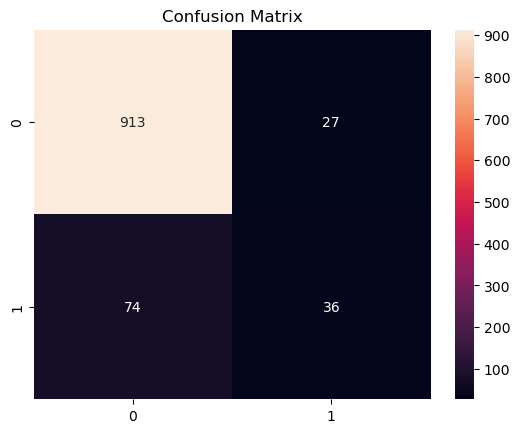

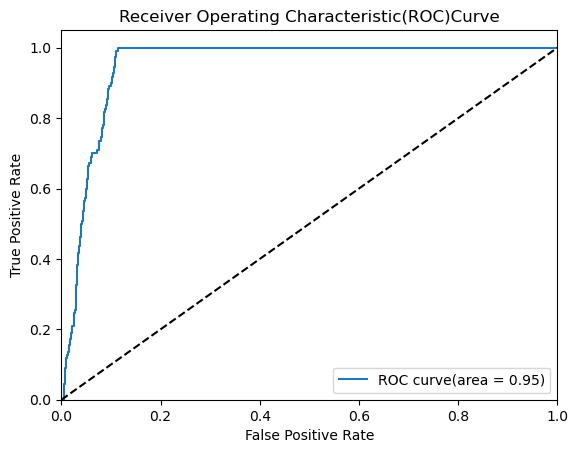

In [79]:
# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Round metrics to 2 decimal places
accuracy = round(accuracy, 2)
precision = round(precision, 2)
recall = round(recall, 2)
f1 = round(f1, 2)
roc_auc = round(roc_auc, 2)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Roc-Auc: {roc_auc}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve

# Specify the positive label
# pos_label = 'Used_Property_Management_Software_Yes'

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label = 'ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC)Curve')
plt.legend(loc='lower right')
plt.show()